<a href="https://colab.research.google.com/github/wildanhniif/Affinity-Propagation-Clustering-on-20-Newsgroups-Dataset/blob/main/affinity_propagation_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
import matplotlib.pyplot as plt
import os
import tarfile

In [ ]:
tar_file = '20news-bydate.tar.gz'
if os.path.exists(tar_file):
    with tarfile.open(tar_file, 'r:gz') as tar:
        tar.extractall(path='.')
    print("File berhasil diekstrak ke folder '20news-bydate'.")
else:
    raise FileNotFoundError("File '20news-bydate.tar.gz' tidak ditemukan. Pastikan sudah diunggah.")

File berhasil diekstrak ke folder '20news-bydate'.


In [ ]:
train_path = '20news-bydate-train'
if not os.path.exists(train_path):
    raise FileNotFoundError(f"Folder '{train_path}' tidak ditemukan. Pastikan sudah diunggah dan diekstrak.")

newsgroups = load_files(train_path, encoding='latin1', decode_error='replace')
X = newsgroups.data
target_names = newsgroups.target_names

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

In [ ]:
svd = TruncatedSVD(n_components=50, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

In [ ]:
af = AffinityPropagation(preference=-500, random_state=0).fit(X_reduced)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [ ]:
cluster_labels = af.labels_
n_clusters = len(af.cluster_centers_indices_)

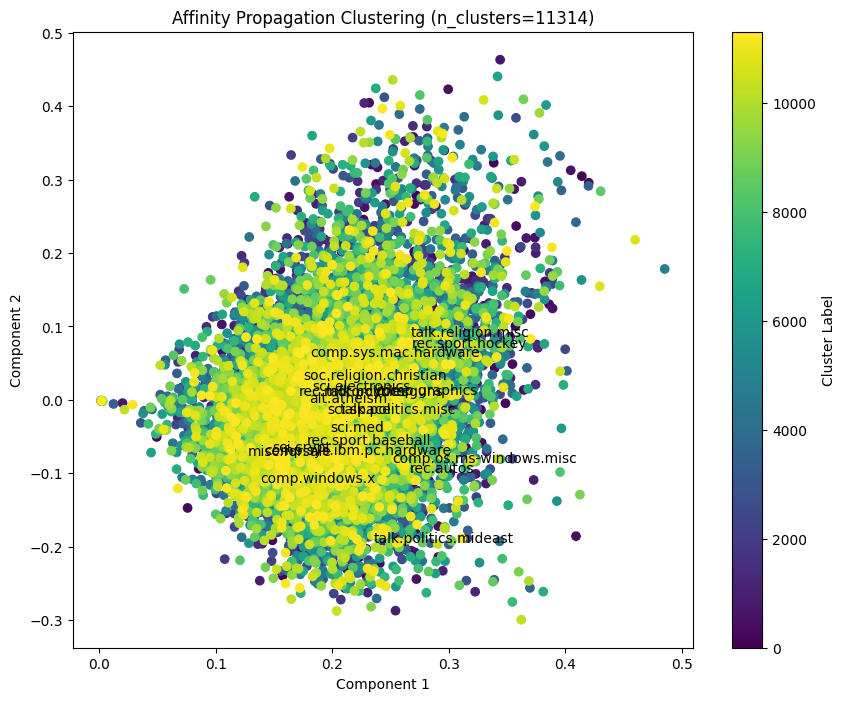

Estimated number of clusters: 11314


In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(label='Cluster Label')
plt.title(f'Affinity Propagation Clustering (n_clusters={n_clusters})')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
for i, name in enumerate(target_names):
    plt.annotate(name, (X_reduced[cluster_labels == i, 0].mean(), X_reduced[cluster_labels == i, 1].mean()), xytext=(5, 5), textcoords='offset points')
plt.show()

print(f"Estimated number of clusters: {n_clusters}")